In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
import povertymapping.dhs_data_proc as pdhs

In [5]:
dhs_config = dict(
        save_path="../test_data/real_outputs/dhs_mm",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="mm",
        dhs_folder="dhs_mm",
        dhs_zip_folder="MMHR71DT",
        dhs_file="MMHR71FL.DTA",
        country="mm",
        dhs_geo_zip_folder="MMGE71FL",
        dhs_geo_file="MMGE71FL.shp",
    )

In [6]:
!rm -rf {dhs_config['save_path']}

In [7]:
%%time
pdhs.process_dhs_data(dhs_config)

Data Dimensions: (12500, 2372)
Data Dimensions: (441, 1)
CPU times: user 49.6 s, sys: 977 ms, total: 50.5 s
Wall time: 50.5 s


/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [8]:
dhs_ph_base = pd.read_csv(Path(dhs_config['save_path'])/'MMHR71DT_base.csv')

In [9]:
len(dhs_ph_base)

12500

In [10]:
%%time
gdf = gpd.read_file(Path(dhs_config['save_path'])/'MMHR71DT_MMGE71FL_by_cluster.geojson')

CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 107 ms


In [11]:
gdf.columns

Index(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.head()

,DHSCLUST,Wealth Index,DHSID,DHSCC,DHSYEAR,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,1,-52232.000000,MM201500000001,MM,2015.0,BM,NULL,NULL,NULL,NULL,...,8.0,Magway,GPS,R,20.058637,95.360081,107.0,105.0,WGS84,POINT (95.36008 20.05864)
1,2,130773.724138,MM201500000002,MM,2015.0,BM,NULL,NULL,NULL,NULL,...,12.0,Yangon,GPS,U,17.112398,96.045616,31.0,14.0,WGS84,POINT (96.04562 17.11240)
2,3,-4955.000000,MM201500000003,MM,2015.0,BM,NULL,NULL,NULL,NULL,...,10.0,Mon,GPS,R,16.507664,97.364236,4.0,2.0,WGS84,POINT (97.36424 16.50766)
3,4,47824.103448,MM201500000004,MM,2015.0,BM,NULL,NULL,NULL,NULL,...,1.0,Kachin,GPS,U,26.684519,96.283879,193.0,210.0,WGS84,POINT (96.28388 26.68452)
4,5,9434.482759,MM201500000005,MM,2015.0,BM,NULL,NULL,NULL,NULL,...,12.0,Yangon,GPS,R,16.866059,96.053499,12.0,5.0,WGS84,POINT (96.05350 16.86606)


In [14]:
import matplotlib.pyplot as plt

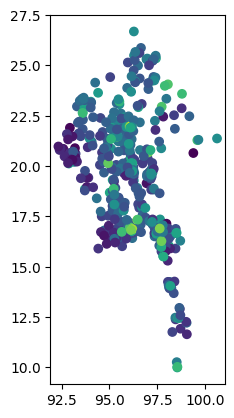

In [15]:
# remove data where lat/long == 0.0
ax = plt.axes()
ax = gdf.plot(column='Wealth Index',ax=ax)